<a href="https://colab.research.google.com/github/shobanj/genai_assignment_level3/blob/main/GenAI_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement
A company wants to predict employee productivity scores to improve workforce planning and training programs. You are hired as a Data Scientist to build a multivariate linear regression model that predicts an employee’s Productivity Score based on multiple work-related factors.
Experience (yrs),Training Hours,Working Hours,Projects
,Productivity Score
2,40,38,3,62
5,60,42,6,78
1,20,35,2,55
8,80,45,8,88
4,50,40,5,72
10,90,48,9,92
3,30,37,4,65
6,70,44,7,82
7,75,46,7,85
2,25,36,3,60
Interpretation
* Which factor most strongly impacts productivity?
* How does training affect productivity?
* Should the company increase training hours or working hours?
* What happens if Working Hours increase beyond optimal limits?
* Can productivity ever decrease with more experience?
* How would you detect overfitting in this model?
* Suggest one new feature to improve prediction accuracy.


In [1]:
import pandas as pd
import sklearn

In [2]:
import io

data = """Experience (yrs),Training Hours,Working Hours,Projects,Productivity Score
2,40,38,3,62
5,60,42,6,78
1,20,35,2,55
8,80,45,8,88
4,50,40,5,72
10,90,48,9,92
3,30,37,4,65
6,70,44,7,82
7,75,46,7,85
2,25,36,3,60"""

df = pd.read_csv(io.StringIO(data))
display(df.head())

,Experience (yrs),Training Hours,Working Hours,Projects,Productivity Score
0,2,40,38,3,62
1,5,60,42,6,78
2,1,20,35,2,55
3,8,80,45,8,88
4,4,50,40,5,72


In [3]:
df.corr()

,Experience (yrs),Training Hours,Working Hours,Projects,Productivity Score
Experience (yrs),1.000000,0.969810,0.973178,0.988194,0.981991
Training Hours,0.969810,1.000000,0.993132,0.977151,0.987045
Working Hours,0.973178,0.993132,1.000000,0.974701,0.985684
Projects,0.988194,0.977151,0.974701,1.000000,0.995696
Productivity Score,0.981991,0.987045,0.985684,0.995696,1.000000


## Which factor most strongly impacts productivity?

From above correlation matrix, projects worked seems to have the highest impact (0.99) w.r.t productivity

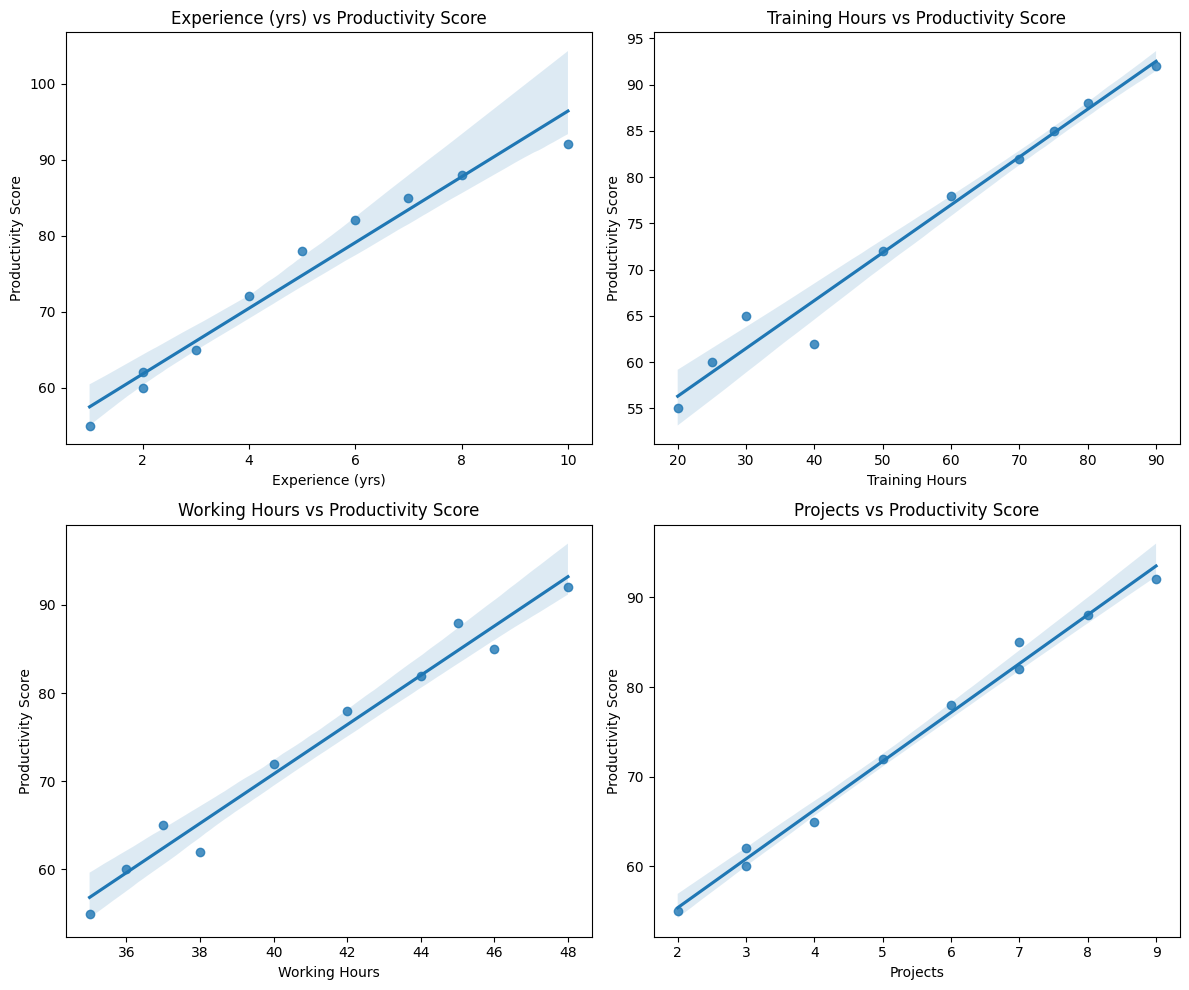

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the features to plot against 'Productivity Score'
features = ['Experience (yrs)', 'Training Hours', 'Working Hours', 'Projects']
target = 'Productivity Score'

# Calculate the number of rows and columns for the subplots
n_features = len(features)
n_cols = 2  # You can adjust this for better layout
n_rows = (n_features + n_cols - 1) // n_cols # Ceiling division

# Create the figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

# Flatten the axes array for easy iteration if it's a 2D array
if n_rows > 1 and n_cols > 1:
    axes = axes.flatten()

# Plot each feature against the target variable
for i, feature in enumerate(features):
    if n_rows == 1 and n_cols == 1: # Handle case of single subplot
        ax = axes
    elif n_rows == 1 or n_cols == 1: # Handle case of 1D array of subplots
        ax = axes[i]
    else:
        ax = axes[i]

    ## sns.scatterplot(x=feature, y=target, data=df, ax=ax)
    sns.regplot(x=df[feature], y=df[target], data=df, ax=ax)

    ax.set_title(f'{feature} vs {target}')
    ax.set_xlabel(feature)
    ax.set_ylabel(target)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features (X) and target (y)
X = df[['Experience (yrs)', 'Training Hours', 'Working Hours', 'Projects']]
y = df['Productivity Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display model coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Mean Squared Error: 8.40
R-squared: 0.31

Model Coefficients:
Experience (yrs): -0.26
Training Hours: 0.27
Working Hours: -1.09
Projects: 4.89
Intercept: 78.17


## Which factor most strongly impacts productivity? Based on the absolute values of the model coefficients:

* Projects: 4.89
* Working Hours: |-1.09| = 1.09
* Training Hours: 0.27
* Experience (yrs): |-0.26| = 0.26

The Projects factor has the largest coefficient (4.89), indicating it has the strongest positive impact on productivity according to this model.

## How does training affect productivity?

The coefficient for Training Hours is 0.27. This positive value suggests that for every additional hour of training, the Productivity Score is predicted to increase by 0.27 points, assuming all other factors remain constant.

## Should the company increase training hours or working hours?

Training Hours has a positive coefficient (0.27), suggesting increasing them would boost productivity.
Working Hours has a negative coefficient (-1.09), suggesting increasing them would decrease productivity.
Based on this model, the company should consider increasing Training Hours rather than Working Hours to improve productivity.

## What happens if Working Hours increase beyond optimal limits?

The current linear regression model provides a coefficient of -1.09 for Working Hours. This implies that, within the range of data the model was trained on, any increase in working hours is associated with a decrease in productivity. A simple linear model doesn't inherently understand 'optimal limits' or diminishing returns; it applies the observed linear trend. In a real-world scenario, productivity might initially increase with working hours up to an optimal point, and then decrease due to fatigue or burnout. However, this model only captures a negative relationship.

## Can productivity ever decrease with more experience?

The model's coefficient for Experience (yrs) is -0.26. This negative coefficient suggests that, according to this specific dataset and model, an increase in years of experience is associated with a slight decrease in productivity. While this might seem counter-intuitive, it's what the model learned from the provided data. This could be due to various reasons not captured by the features, or simply the specific distribution of the sample data.

## How would you detect overfitting in this model?

Overfitting occurs when a model performs very well on the data it was trained on but poorly on new, unseen data. To detect overfitting in this linear regression model, you would:

Compare Training and Test Performance: Check if the R-squared (or Mean Squared Error) on the training set is significantly better than on the test set. A large discrepancy suggests overfitting. (In the results, the R-squared on the test set is 0.31, which is not very high, suggesting the model might not be complex enough to overfit severely, or simply has limited predictive power on this small test set).

## Suggestions for new features

Cross-Validation: Implement k-fold cross-validation. This involves splitting the data into multiple folds, training the model on a subset of folds, and testing on the remaining fold. Consistent performance across folds and similar training/validation scores would indicate less overfitting.

Learning Curves: Plot the model's performance (e.g., MSE or R-squared) on both the training and validation sets as a function of the training set size. If the training score is high and the validation score is low, with a significant gap between them, it's an indicator of overfitting.